# Instructions

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

# Introduction

For this challenge, I'm using a dataset on housing prices from a Kaggle competition.  The dataset pertains to houses in Iowa and was compiled specifically for ML educational purposes.

# Load & clean

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [174]:
housing_df = pd.read_csv("khous_train.csv")
housing_test_df = pd.read_csv("khous_test.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [175]:
# for the sake of this regression modeling, we're going to use only the quantitative variables
housing_df = housing_df.select_dtypes(['int64', 'float64'])
housing_test_df = housing_df.select_dtypes(['int64', 'float64'])
# we'll also combine all deck area to simplify things
# housing_df["deck_area"] = housing_df["WoodDeckSF"] + housing_df["OpenPorchSF"] 

# LotFrontage and GarageYrBuilt have a bunch of NaNs, so we'll drop them. 
# We retain all 1460 rows of training set, all 1459 of test set.
housing_df.drop(["LotFrontage","GarageYrBlt", "MasVnrArea"], axis=1, inplace=True)
housing_test_df.drop(["LotFrontage","GarageYrBlt", "MasVnrArea"], axis=1, inplace=True)
housing_test_df.dropna(inplace=True)
housing_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


# Scoring models

In [115]:
X_train = housing_df.drop('SalePrice', axis=1)
y_train = housing_df["SalePrice"]
X_test = housing_test_df.drop('SalePrice', axis=1)
y_test = housing_test_df["SalePrice"]

First, the basic linear regression:

In [183]:
from sklearn import linear_model
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train, y_train)
lr_score = rModel.score(X_test, y_test)
print("Basic linear regression R-squared: " + str(round(lr_score, 3)))

Basic linear regression R-squared: 0.809


Then the basic and weighted KNN regression:

In [181]:
from sklearn import neighbors
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
knn_w.fit(X_train, y_train)
knn_w_score = knn_w.score(X_test, y_test)
print("Basic KNN R-squared for k=10: " + str(round(knn_score, 3)))
print("Weighted KNN R-squared for k=10: " + str(round(knn_w_score, 3)))

Basic KNN R-squared for k=10: 0.832
Weighted KNN R-squared for k=10: 1.0


# Question - what's going on here?

Basically, these are very similar results, with the KNN looking slightly better.

NOTE: I have no idea why the R-squared value is coming back as 1.0 for the weighted KNN regression; from the learning curve below, it's clear that it tops out at just under .8 like the others.

In fact, this is a good question: why do the learning curves produce different values from the tests above??  What gives here?

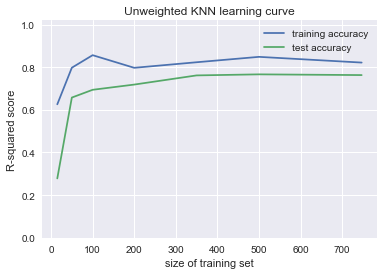

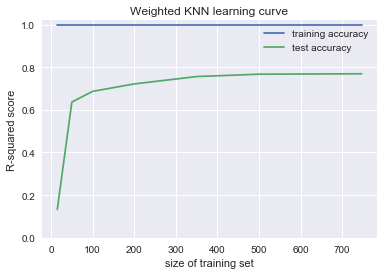

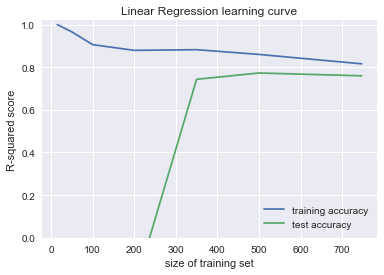

In [185]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, label):
    train_size, train_score, test_score = learning_curve(model, X_train, y_train, train_sizes=[15,50,100,200,350,500,747], cv=3)
    train_score = np.mean(train_score, axis=1)
    test_score = np.mean(test_score, axis=1)
    plt.plot(train_size, train_score, label="training accuracy")
    plt.plot(train_size, test_score, label="test accuracy")
    plt.xlabel("size of training set")
    plt.ylabel("R-squared score")
    plt.legend()
    plt.ylim((0.0, 1.02))
    plt.title(label)
    plt.show()
plot_learning_curve(knn, "Unweighted KNN learning curve")
plot_learning_curve(knn_w, "Weighted KNN learning curve")
plot_learning_curve(rModel, "Linear Regression learning curve")


# Conclusions
Looking at the learning curves above, it seems like all three of these models max out at an R-squared accuracy of just a hair under 0.8.  This is good, but far from perfect.  The KNN models get to that asymptote faster than the linear regression.  I'm not sure why the weighted KNN training accuracy registers as 1.0 all the way across, but other than that none of these models show any signs of overfitting: in all cases, the test and training accuracies converge to a very small margin of difference.

Based on what we've seen here, I would choose to run with the linear regression model, simply because I know about many more ways to tweak and optimize it.  I could check scatterplots with price, perhaps try squaring and/or square-rooting features, combining them, etc. - as well as various forms of regularization.  But it seems that the accuracy of any of these models is about the same.